# Problem 1

In [117]:
%%timeit
n = 1000
s = 0
for i in range(1, n):
    if i % 3 == 0 or i % 5 == 0:
        s+=i
    else :
        pass


91.3 µs ± 1.77 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [119]:
print(s)

279500


# Problem 2

Each new term in the Fibonacci sequence is generated by adding the previous two terms. By starting with 1 and 2, the first 10 terms will be:

1, 2, 3, 5, 8, 13, 21, 34, 55, 89, ...
By considering the terms in the Fibonacci sequence whose values do not exceed four million, find the sum of the even-valued terms.

In [134]:
s = 0
def fibonacci(n):
    if n == 0 :
        return 0
    elif n == 1 or n == 2:
        return 1
    else :
        return fibonacci(n-1) + fibonacci(n-2)


In [166]:
%%timeit
s = 0
f0, f1, f2 = 2, 1, 2
while f0 < 4000000:
    if f0 % 2 == 0:
        s+=f0
    f0 = f1 + f2
    f1 = f2
    f2 = f0

2.54 µs ± 27.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [162]:
s

4613732

# Problem 3

The prime factors of 13195 are 5, 7, 13 and 29.

What is the largest prime factor of the number 600851475143 ?

In [191]:
import numpy as np

In [253]:
def lpf(n):
    l = 2
    while (n > l):
        if (n % l == 0):
            n = n / l
            l = 2
        else:
            l+=1
    print("Largest Prime Factor: %d" % (l))

In [254]:
lpf(600851475143)

Largest Prime Factor: 6857


# Problem 4

A palindromic number reads the same both ways. The largest palindrome made from the product of two 2-digit numbers is 9009 = 91 × 99.

Find the largest palindrome made from the product of two 3-digit numbers.

In [1]:
def checkPalindrome(x):
    convertedNumber = str(x)
    reverseString = convertedNumber[::-1]
    return reverseString == convertedNumber

In [29]:
#%%timeit
palindrome = 0
factors = []
for a in range(999, 900, -1):
    for b in range(999, 900, -1):
        c = a * b
        if checkPalindrome(c) and c > palindrome :
            palindrome = c
            factors = [a, b]

In [30]:
palindrome, factors

(906609, [993, 913])

# Problem 144

In [78]:
import numpy as np
import matplotlib.pyplot as plt

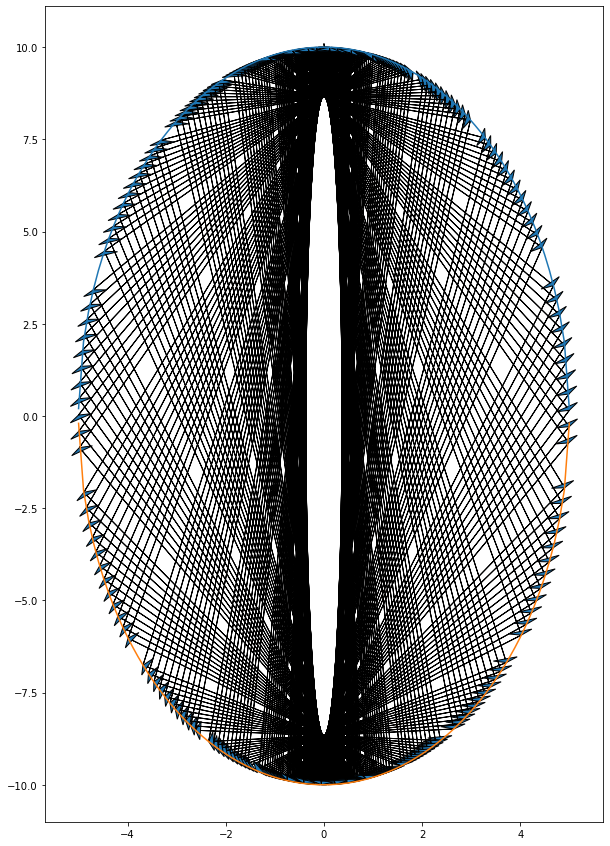

In [75]:
A = (0.0, 10.1)
B = (1.4, -9.6)

x, y = 1, 1
i = 0

fig, ax = plt.subplots()
fig.set_size_inches(10, 15)
X = np.linspace(-4.999, 4.999, 100)
ax.plot(X, np.sqrt(-4*X**2 + 100))
ax.plot(X, -np.sqrt(-4*X**2 + 100))

while not (np.abs(x) < 0.01 and y > 0):
    ax.arrow(A[0], A[1], B[0]-A[0], B[1]-A[1], head_width=0.5, head_length=0.1, length_includes_head=True)
    
    # arrival beam : 
    ae = (A[1] - B[1]) / (A[0] - B[0])
    be = A[1] - ae * A[0]

    # tangent : 
    x, y = B
    slope = -4 * x / y
    at, bt = slope, y - slope * x

    # normal : 
    an, bn = -1/at, y + (1/at) * x
    
    # equation of the rotated normal vector :
    arn = (2*an-ae+(an**2)*ae)/(2*an*ae-an**2+1)
    brn = y - arn * x

    # solve the equation of intersection of this vector with the ellipse
    delta = 4*(arn*brn)**2 - 4*(4+arn**2)*(brn**2-100)

    xm = (-2*arn*brn - np.sqrt(delta)) / (2*(4 + arn**2))
    ym = arn * xm + brn
    xp = (-2*arn*brn + np.sqrt(delta)) / (2*(4 + arn**2))
    yp = arn * xp + brn

    # choose the solution farthest from B
    if np.linalg.norm([xm-x, ym-y]) > np.linalg.norm([xp-x, yp-y]) :
        x, y = xm, ym
    else :
        x, y = xp, yp

    A = B
    B = (x, y)
    i+=1
    if i == 1000:
        break
    


In [77]:
i

354